In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


### Functions for clusterization

These functions will put data into "buckets".

In [3]:
#Function to clusterize categories of a certain feature, and add the new clusterized feature as a new column
# Clusters should be an input of the form {cluster_A: {categories}, cluster_B: [categories]}
# Ex. obesity = {0:[1,2,3], 1:[4,5,6]}
def clusterizeDiscrete(feature, clusters, new_name, data):
    new_data = data.copy()
    original_list = data.loc[1:1080, feature]
    new_list = []
    for index in original_list.index:
        cat = False
        if original_list[index] == -1 or original_list[index] == "-1":
            new_list.append("N")
            continue
        for cluster in clusters:
            if original_list[index] in clusters[cluster]:
                new_list.append(cluster)
                cat = True
        if cat == False:
            new_list.append("N")
    new_data[new_name] = new_list
    return new_data

# Function to clusterize categories of a certain continous feature, and add the new clusterized feature as a
# new column
# Clusters shoud be an input of the form {cluster_A: {lambdaFunction1}, cluster_B: lambdaFunction2}
def clusterizeContinuous(feature, clusters, new_name, data):
    new_data = data.copy()
    original_list = data.loc[1:1080, feature]
    new_list = []
    for index in original_list.index:
        if original_list[index] == -1 or original_list[index] == "-1":
            new_list.append("N")
            continue
        for cluster in clusters:
            if eval(clusters[cluster])(original_list[index]):
                new_list.append(cluster)
                break
    new_data[new_name] = new_list
    return new_data
        

# Set of auxiliary high-order functions that will evaluate the conditions to binarize a history
def lessThan(num):
    return lambda n: n < num

def lessQThan(num):
    return lambda n: n <= num

def greaterThan(num):
    return lambda n: n > num

def greaterQThan(num):
    return lambda n: n >= num

def between(num1, num2):
    return lambda n: n <= num2 and n >= num1

### Clusters definition and creation

In [28]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = clusterizeDiscrete("AIMC", obesity, "obesity", fdata)

# Clusterize between degrees of study (higher degree vs. non higher degree)
degree = {0:["Prim", "Sec", "Bach", "CarTec", "Otro"], 1:["Lic", "Mast", "Doc", "PDoc"]}
ndata = clusterizeDiscrete("id_gestud", degree, "hdegree", ndata)

# Clusterize excercise features
ejer = {"A":"greaterQThan(2.5)", "B":"lessThan(2.5)"}
ndata = clusterizeContinuous("ejer_act", ejer, "ejer0B", ndata)
ndata = clusterizeContinuous("ejer1", ejer, "ejer1B", ndata)
ndata = clusterizeContinuous("ejer5", ejer, "ejer5B", ndata)
ndata = clusterizeContinuous("ejer10", ejer, "ejer10B", ndata)
ndata = clusterizeContinuous("ejer20", ejer, "ejer20B", ndata)
ndata = clusterizeContinuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize stress features
estres = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("estres_act", estres, "estres0B", ndata)
ndata = clusterizeDiscrete("estres1", estres, "estres1B", ndata)
ndata = clusterizeDiscrete("estres5", estres, "estres5B", ndata)
ndata = clusterizeDiscrete("estres10", estres, "estres10B", ndata)
ndata = clusterizeDiscrete("estres20", estres, "estres20B", ndata)
ndata = clusterizeDiscrete("estres30", estres, "estres30B", ndata)

# Clusterize weight features
peso = {"A":[1,2,3], "B":[4,5]}
ndata = clusterizeDiscrete("peso_act", peso, "peso0B", ndata)
ndata = clusterizeDiscrete("peso1", peso, "peso1B", ndata)
ndata = clusterizeDiscrete("peso5", peso, "peso5B", ndata)
ndata = clusterizeDiscrete("peso10", peso, "peso10B", ndata)
ndata = clusterizeDiscrete("peso20", peso, "peso20B", ndata)
ndata = clusterizeDiscrete("peso30", peso, "peso30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("condi_act", condi, "condi0B", ndata)
ndata = clusterizeDiscrete("condi1", condi, "condi1B", ndata)
ndata = clusterizeDiscrete("condi5", condi, "condi5B", ndata)
ndata = clusterizeDiscrete("condi10", condi, "condi10B", ndata)
ndata = clusterizeDiscrete("condi20", condi, "condi20B", ndata)
ndata = clusterizeDiscrete("condi30", condi, "condi30B", ndata)

# Clusterize health features
health = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("salud_act", health, "salud0B", ndata)
ndata = clusterizeDiscrete("salud1", health, "salud1B", ndata)
ndata = clusterizeDiscrete("salud5", health, "salud5B", ndata)
ndata = clusterizeDiscrete("salud10", health, "salud10B", ndata)
ndata = clusterizeDiscrete("salud20", health, "salud20B", ndata)
ndata = clusterizeDiscrete("salud30", health, "salud30B", ndata)

# Clusterize job features
academic = {0:["Admin", "Asi", "Coo", "E", "ED", "EM", "Int", "Jef", "Lab", "Sec", "Tec", "Vig"], 1:["Acade", "Inv", "InvE"]}
ndata = clusterizeDiscrete("Apuesto", academic, "academic", ndata)

# Clusterize walking features
walking = {"A":"greaterQThan(1800.0)", "B":"lessThan(1800.0)"}
ndata = clusterizeContinuous("dis_dia", walking, "dis_dia0B", ndata)
ndata = clusterizeContinuous("dis1_dia", walking, "dis_dia1B", ndata)
ndata = clusterizeContinuous("dis5_dia", walking, "dis_dia5B", ndata)
ndata = clusterizeContinuous("dis10_dia", walking, "dis_dia10B", ndata)
ndata = clusterizeContinuous("dis20_dia", walking, "dis_dia20B", ndata)
ndata = clusterizeContinuous("dis30_dia", walking, "dis_dia30B", ndata)


# Clusterize age features
age = {0:"between(15.0, 28.0)", 1:"between(28.1, 40.0)", 2:"between(40.1, 60.0)", 3:"between(60.1, 90.0)"}
ndata = clusterizeContinuous("Aedad", age, "AedadC", ndata)

In [29]:
ndata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,salud20B,salud30B,academic,dis_dia0B,dis_dia1B,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,A,0,B,B,A,N,N,N,2
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,A,A,0,A,B,B,B,A,B,1
3,F,34,3,Int,Sec,5,1,1,0,0,...,A,N,0,B,B,B,B,B,B,1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,0,A,A,A,A,A,A,3
5,M,42,4,EM,Sec,3,1,2,2,2,...,N,N,0,B,B,B,N,N,N,2


### Functions for grouping variables

These functions will aid in the construction of histories and other composite random variables.

In [30]:
# Function to build a composite random variable from two variables
def groupVariables(feature_1, feature_2, new_name, data):
    new_data = data.copy()
    list_feat_1 = data.loc[1:1080, feature_1]
    list_feat_2 = data.loc[1:1080, feature_2]
    new_list = []
    for index in list_feat_1.index:
        new_list.append(str(list_feat_1[index]) + str(list_feat_2[index]))
    new_data[new_name] = new_list
    return new_data

# Function to build a composite random variable from several variables (to create a history, for example)
def groupListOfVariables(list_of_features, new_name, data):
    new_data = data.copy()
    new_list = []
    i = 0
    for feature in list_of_features:
        buffer_list = data.loc[1:1080, feature]
        if i == 0:
            for index in buffer_list.index:
                new_list.append(str(buffer_list[index]))
                i = i + 1
        else:
            k = 0
            for index in buffer_list.index:
                new_list[k] = new_list[k] + str(buffer_list[index])
                k = k + 1
    new_data[new_name] = new_list
    return new_data

In [63]:
#test = groupListOfVariables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B"], "ExerHistory", ndata)
#test.head()

### Histories creation

In [31]:
ndata = groupListOfVariables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B"], "ejerHistory", ndata)
ndata = groupListOfVariables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"], "condiHistory", ndata)
ndata = groupListOfVariables(["estres0B", "estres1B", "estres5B", "estres10B", "estres20B", "estres30B"], "estresHistory", ndata)
ndata = groupListOfVariables(["salud0B", "salud1B", "salud5B", "salud10B", "salud20B", "salud30B"], "saludHistory", ndata)
ndata = groupListOfVariables(["dis_dia0B", "dis_dia1B", "dis_dia5B", "dis_dia10B", "dis_dia20B", "dis_dia30B"], "dis_diaHistory", ndata)
#ndata = groupListOfVariables(["peso0B", "peso1B", "peso5B", "peso10B", "peso20B", "peso30B"], "pesoHistory", ndata)
ndata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB
3,F,34,3,Int,Sec,5,1,1,0,0,...,B,B,B,B,1,BBBANN,BBBBAN,AAAABN,BBAAAN,BBBBBB
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,B,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN


### Auxiliary functions for manipulating histories

In [3]:
# Function to determine if a certain history matches a general pattern
def matchStructure(history, structure):
    if type(history) is str: 
        if len(history) != len(structure):
            return False
        for i in range(len(structure)):
            if history[i] != structure[i] and structure[i] != '*':
                return False
        return True
    else:
        return False
    
def stringGenerator(string, num):
    seeds = ["A", "B", "*"]
    strings = []
    if num == 0:
        return string
    else:
        for seed in seeds:
            strings.append(stringGenerator(string + seed, num - 1))
    return strings

def stringPadding(pre_padding, strings, post_padding):
    new_strings = []
    for string in strings:
        new_strings.append(pre_padding + string + post_padding)
    return new_strings

In [9]:
matchStructure(1, "****")

False

### Functions for counting/calculating probabilities

In [2]:
# Functions to count ocurrences for a category of a feature (NX)

# Count the number of instances inside the database whose feature X = category
# Ex: getNX('AIMC', 3, fdata)
def getNX(feature, category, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature] == category:
            count = count + 1
        elif matchStructure(data.loc[index][feature], category):
            count = count + 1
    return count

# Count the number of instances inside the database whose feature X_1 = category_1 and feature X_2 = category_2
# Ex: getNCX('AIMC', 3, 'Obesidad', 1, fdata)
def getNCX(feature_1, category_1, feature_2, category_2, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature_1] == category_1 and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
        elif data.loc[index][feature_1] == category_1 and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
    return count

# Get a conditional probability P(F_1 = C_1 | F_2 = C_2)
def getCondProb(feature_1, category_1, feature_2, category_2, data):
    ncx = getNCX(feature_1, category_1, feature_2, category_2, data)
    nx = getNX(feature_2, category_2, data)
    if nx != 0:
        p = ncx / float(nx)
    else:
        p = 0
    #return {'P': p, 'nx': nx, 'ncx': ncx}
    return p

def getEpsilon(feature, category, classFeature, classCategory, data):
    n = len(data)
    nx = getNX(feature, category, data)
    nc = getNX(classFeature, classCategory, data)
    ncx = getNCX(feature, category, classFeature, classCategory, data)
    if n != 0 and nx != 0:
        pc = nc / float(n)
        pcx = ncx / float(nx)
        epsilon = nx * (pcx - pc) / math.sqrt(nx * pc * (1 - pc))
    else:
        epsilon = 0
    #print 'Epsilon :' + str(epsilon)
    return {'feat': feature, 'cat': category, 'class': classFeature, 'classcat': classCategory, 'epsilon': epsilon, 'nx': nx, 'ncx': ncx, 'nc': nc}

def getHistoriesEpsilons(feature, categories, classFeature, classCategory, data):
    epsilons = []
    for category in categories:
        epsilons.append(getEpsilon(feature, category, classFeature, classCategory, data))
    return epsilons

def getAllEpsilons(feature, classFeature, classCategory, data):
    catlist = getCategories(feature, data)
    epsilons = []
    for category in catlist:
        epsilons.append(getEpsilon(feature, category, classFeature, classCategory, data))
    return pd.DataFrame(epsilons)

def getCategories(feature, data):
    index_list = data.loc[1:1080, feature]
    categories = {}
    for index in index_list.index:
        categories[index_list[index]] = "1"
    return categories.keys()
    
def getHistoriesEpsilonsLOC(feature, categories, classFeature, data):
    catlist = getCategories(classFeature, data)
    epsilons = []
    for category in catlist:
        epsilons = epsilons + getHistoriesEpsilons(feature, categories, classFeature, category, data)
    return pd.DataFrame(epsilons)

### Queries (Histories)

In [12]:
buf = np.array(stringGenerator("", 4)).flatten()
posibilities = stringPadding("", buf, "**")

In [57]:
his_epsilons = getHistoriesEpsilons("ejerHistory", posibilities, "id_sexo", "M", ndata)

In [58]:
df = pd.DataFrame(his_epsilons).set_index("cat")
df.sort_values('epsilon', ascending=False)

,class,classcat,epsilon,feat,nc,ncx,nx
cat,,,,,,,
**AA**,id_sexo,M,2.671375,ejerHistory,386,189,451
***A**,id_sexo,M,2.591625,ejerHistory,386,243,593
AAAA**,id_sexo,M,2.484088,ejerHistory,386,93,211
A*AA**,id_sexo,M,2.363181,ejerHistory,386,108,251
AA*A**,id_sexo,M,2.242042,ejerHistory,386,100,233
*AAA**,id_sexo,M,2.145346,ejerHistory,386,120,286
A**A**,id_sexo,M,2.069910,ejerHistory,386,119,285
BB*A**,id_sexo,M,1.893076,ejerHistory,386,92,219
*A*A**,id_sexo,M,1.843969,ejerHistory,386,131,321


In [59]:
df.to_csv(path_or_buf="epsilons_ejerHistory_id_sexo.csv")

In [60]:
job_ex = getHistoriesEpsilonsLOC("ejerHistory", posibilities, "Apuesto", ndata)

In [61]:
job_ex.to_csv(path_or_buf="epsilons_ejerHistory_job.csv")

### Queries (Other)

In [33]:
getEpsilon("peso0B", "A", "obesity", 1, ndata)

{'cat': 'A',
 'class': 'obesity',
 'classcat': 1,
 'epsilon': -10.4412041435158,
 'feat': 'peso0B',
 'nc': 228,
 'ncx': 8,
 'nx': 478}

In [343]:
eps = getAllEpsilons("Apuesto", "estresHistory", "BBB***", ndata)

In [346]:
eps.sort_values("epsilon", ascending=False)

,cat,class,classcat,epsilon,feat,nc,ncx,nx
8,Int,estresHistory,BBB***,4.330680,Apuesto,358,58,110
7,Lab,estresHistory,BBB***,1.847083,Apuesto,358,22,48
2,Vig,estresHistory,BBB***,1.706208,Apuesto,358,16,34
6,Tec,estresHistory,BBB***,1.696567,Apuesto,358,25,57
13,InvE,estresHistory,BBB***,1.227593,Apuesto,358,2,3
3,Admin,estresHistory,BBB***,1.080403,Apuesto,358,29,74
10,Acade,estresHistory,BBB***,0.436334,Apuesto,358,81,234
11,Jef,estresHistory,BBB***,-0.420331,Apuesto,358,30,96
5,Inv,estresHistory,BBB***,-0.525002,Apuesto,358,26,85
9,Sec,estresHistory,BBB***,-0.594226,Apuesto,358,20,67


In [348]:
q2 = getAllEpsilons("Apuesto", "obesity", 1, ndata)

In [20]:
q2.sort_values("epsilon", ascending=False)

NameError: name 'q2' is not defined

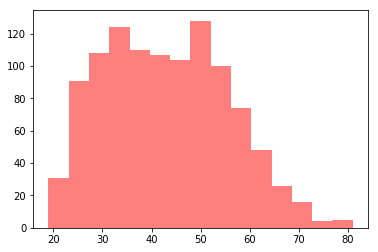

In [33]:
ages = ndata.loc[1:1080, "Aedad"]
n, bins, patches = plt.hist(ages.values, 15, facecolor='red', alpha=0.5)

In [35]:
getCondProb("id_sexo", "F", "obesity", 1, ndata)

0.6491228070175439

### Transition Probabilities

In [36]:
# PENDING: Modularize this function, as it only works now with binary type variables
def transitionProbabilities(feature, data):
    years = ["30", "20", "10", "5", "1", "0"]
    transitionProbs = {}
    transitionProbs["labels"] = []
    transitionProbs["probs"] = []
    transitionProbs["pattern"] = []
    for i in range(len(years)):
        for j in range(i):
            feature_1 = feature + years[i] + "B"
            feature_2 = feature + years[j] + "B"
            f_1 = "a_" + years[i]
            f_2 = "a_" + years[j]
            label_1 = f_1 + ": A | " + f_2 + ": A "
            label_2 = f_1 + ": B | " + f_2 + ": A "
            label_3 = f_1 + ": A | " + f_2 + ": B "
            label_4 = f_1 + ": B | " + f_2 + ": B "
            prob_1 = getCondProb(feature_1, "A", feature_2, "A", data)
            prob_2 = getCondProb(feature_1, "B", feature_2, "A", data)
            prob_3 = getCondProb(feature_1, "A", feature_2, "B", data)
            prob_4 = getCondProb(feature_1, "B", feature_2, "B", data)
            transitionProbs["labels"].append(label_1)
            transitionProbs["labels"].append(label_2)
            transitionProbs["labels"].append(label_3)
            transitionProbs["labels"].append(label_4)
            transitionProbs["probs"].append(prob_1)
            transitionProbs["probs"].append(prob_2)
            transitionProbs["probs"].append(prob_3)
            transitionProbs["probs"].append(prob_4)
            transitionProbs["pattern"].append("A->A")
            transitionProbs["pattern"].append("A->B")
            transitionProbs["pattern"].append("B->A")
            transitionProbs["pattern"].append("B->B")
            #print label_1 + str(prob_1)
            #print label_2 + str(prob_2)
            #print label_3 + str(prob_3)
            #print label_4 + str(prob_4)
    return pd.DataFrame(data = transitionProbs)

# Function to explore subgroups? 

In [38]:
# All population
tp = transitionProbabilities("peso", ndata)

In [40]:
tp.to_csv(path_or_buf="peso_all.csv", index=False)

In [42]:
# Non Obese vs. Obese
# Get probabilities from both groups into a single DF
tp_obex = transitionProbabilities("peso", ndata[ndata.obesity == 0])
tp_obexc = transitionProbabilities("peso", ndata[ndata.obesity == 1])
tp_obex["probsc"] = tp_obexc.loc[:, "probs"]
tp_obex = tp_obex.rename(columns={"probs":"nobese", "probsc":"obese"})
tp_obex.to_csv(path_or_buf="peso_obese_vs_nobese.csv", index=False)

In [43]:
# Non Higher Degree vs. Higher degree 
tp_degex = transitionProbabilities("peso", ndata[ndata.hdegree == 0])
tp_degexc = transitionProbabilities("peso", ndata[ndata.hdegree == 1])
tp_degex["probsc"] = tp_degexc.loc[:, "probs"]
tp_degex = tp_degex.rename(columns={"probs":"nhdegree", "probsc":"hdegree"})
tp_degex.to_csv(path_or_buf="peso_nhdegree_vs_hdegree.csv", index=False)